In [3]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf  
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
import cv2
from keras.models import load_model

In [3]:
(X_train, Y_train), (X_test, Y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


Labels: 0. airplane, 1. automobile, 2. bird, 3. cat, 4. deer, 5. dog, 6. frog, 7. horse, 8. ship, 9. truck


In [4]:
#Split training dataset into traiing and validation
X_train_new, X_valid, Y_train_new, Y_valid=train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [5]:
X_train_new.shape

(37500, 32, 32, 3)

In [6]:
X_train_new[0]

array([[[120, 118,  66],
        [118, 116,  65],
        [121, 119,  68],
        ...,
        [127, 134,  69],
        [124, 131,  65],
        [128, 134,  71]],

       [[126, 124,  72],
        [123, 121,  70],
        [122, 120,  69],
        ...,
        [125, 130,  70],
        [121, 127,  66],
        [122, 128,  68]],

       [[125, 123,  72],
        [124, 122,  71],
        [125, 123,  72],
        ...,
        [121, 126,  71],
        [123, 128,  73],
        [122, 127,  70]],

       ...,

       [[ 89,  85,  44],
        [ 88,  84,  43],
        [ 81,  77,  37],
        ...,
        [132, 120,  89],
        [128, 120,  84],
        [123, 115,  76]],

       [[112, 103,  62],
        [103,  94,  54],
        [100,  91,  51],
        ...,
        [127, 116,  82],
        [127, 120,  82],
        [132, 124,  85]],

       [[119, 105,  63],
        [116, 102,  60],
        [110,  96,  54],
        ...,
        [125, 115,  77],
        [120, 113,  72],
        [129, 121,  81]]

In [7]:
X_train_new[0].shape

(32, 32, 3)

In [8]:
#Normalization
X_train_new=X_train_new/255
X_test=X_test/255
X_valid=X_valid/255

In [9]:
X_train_new[0]

array([[[0.47058824, 0.4627451 , 0.25882353],
        [0.4627451 , 0.45490196, 0.25490196],
        [0.4745098 , 0.46666667, 0.26666667],
        ...,
        [0.49803922, 0.5254902 , 0.27058824],
        [0.48627451, 0.51372549, 0.25490196],
        [0.50196078, 0.5254902 , 0.27843137]],

       [[0.49411765, 0.48627451, 0.28235294],
        [0.48235294, 0.4745098 , 0.2745098 ],
        [0.47843137, 0.47058824, 0.27058824],
        ...,
        [0.49019608, 0.50980392, 0.2745098 ],
        [0.4745098 , 0.49803922, 0.25882353],
        [0.47843137, 0.50196078, 0.26666667]],

       [[0.49019608, 0.48235294, 0.28235294],
        [0.48627451, 0.47843137, 0.27843137],
        [0.49019608, 0.48235294, 0.28235294],
        ...,
        [0.4745098 , 0.49411765, 0.27843137],
        [0.48235294, 0.50196078, 0.28627451],
        [0.47843137, 0.49803922, 0.2745098 ]],

       ...,

       [[0.34901961, 0.33333333, 0.17254902],
        [0.34509804, 0.32941176, 0.16862745],
        [0.31764706, 0

In [10]:
Y_train_new = to_categorical(Y_train_new)   
Y_test = to_categorical(Y_test)
Y_valid = to_categorical(Y_valid)


In [11]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train_new, Y_train_new, batch_size)

In [12]:
#model creation
model=Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

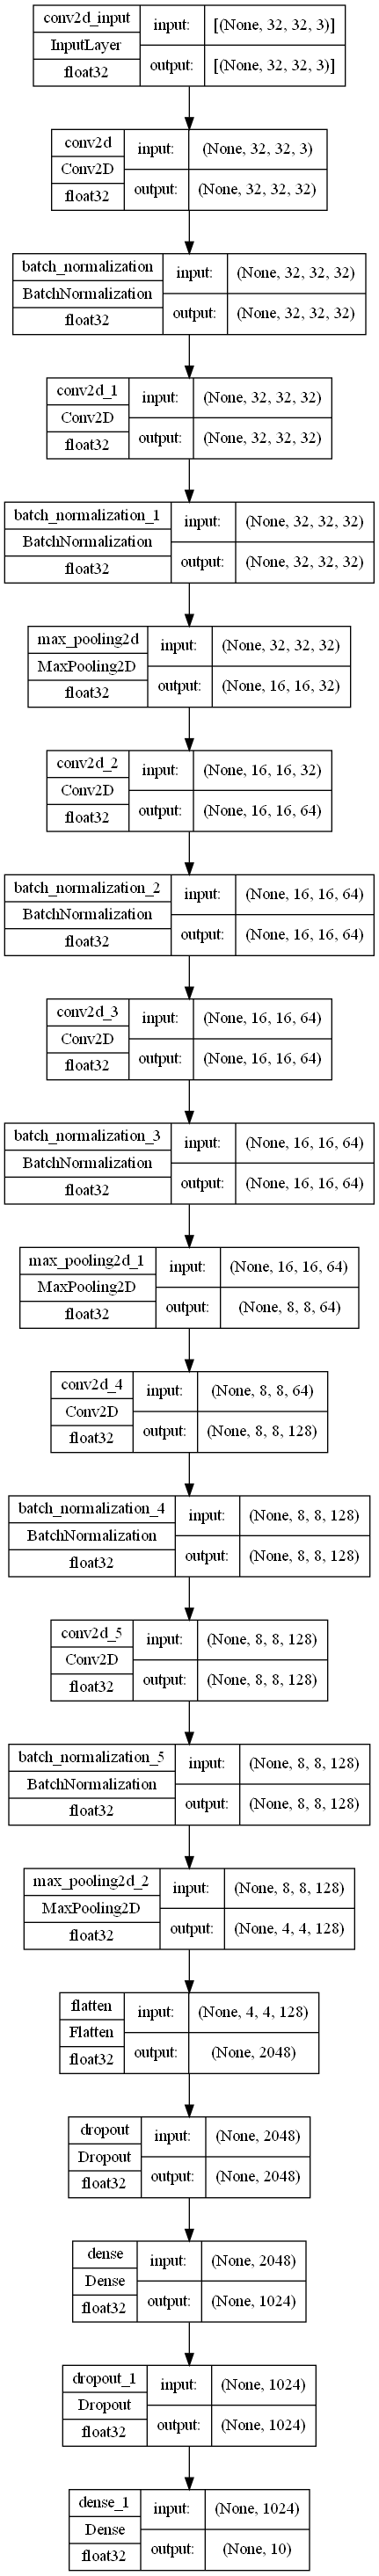

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, show_dtype=True)

In [16]:
#model training
history = model.fit(train_generator, validation_data=(X_valid, Y_valid), epochs=30)

Epoch 1/30
1172/1172 [==============================] - 121s 102ms/step - loss: 1.5972 - accuracy: 0.4495 - val_loss: 1.3380 - val_accuracy: 0.5330
Epoch 2/30
1172/1172 [==============================] - 117s 100ms/step - loss: 1.1364 - accuracy: 0.6035 - val_loss: 1.0285 - val_accuracy: 0.6420
Epoch 3/30
1172/1172 [==============================] - 119s 102ms/step - loss: 0.9721 - accuracy: 0.6641 - val_loss: 0.9784 - val_accuracy: 0.6705
Epoch 4/30
1172/1172 [==============================] - 120s 102ms/step - loss: 0.8830 - accuracy: 0.6977 - val_loss: 0.8863 - val_accuracy: 0.6970
Epoch 5/30
1172/1172 [==============================] - 121s 103ms/step - loss: 0.8076 - accuracy: 0.7232 - val_loss: 0.7110 - val_accuracy: 0.7551
Epoch 6/30
1172/1172 [==============================] - 122s 104ms/step - loss: 0.7500 - accuracy: 0.7430 - val_loss: 0.6592 - val_accuracy: 0.7804
Epoch 7/30
1172/1172 [==============================] - 130s 111ms/step - loss: 0.7002 - accuracy: 0.7634 - val_

In [25]:
model.save("cifar_10.h5")

### Model Evaluation

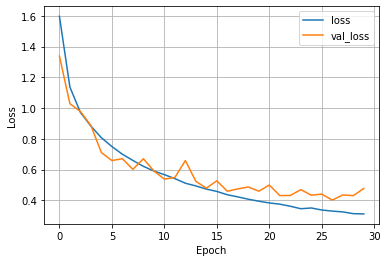

In [17]:
fig = plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

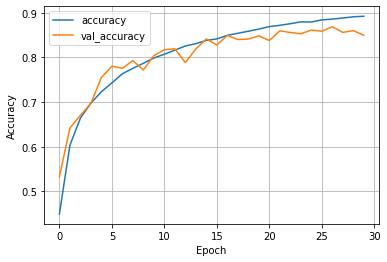

In [18]:
fig = plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.4835 - accuracy: 0.8454


[0.48349112272262573, 0.8453999757766724]

In [20]:
Y_pred=model.predict([X_test])

313/313 [==============================] - 6s 17ms/step


In [21]:
pred_result=np.argmax(Y_pred,axis=1)

In [22]:
Y_true=np.argmax(Y_test,axis=1)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

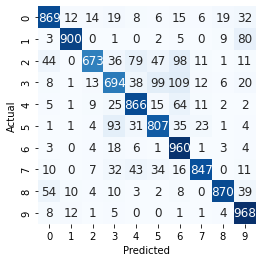

In [23]:
#Confusion Matrix
cm=confusion_matrix(Y_true, pred_result)
df_cm = pd.DataFrame(cm, columns=np.unique(Y_true), index = np.unique(Y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,square=True, fmt="d", cmap="Blues")

In [24]:
#classification report
print(classification_report(Y_true, pred_result))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1       0.96      0.90      0.93      1000
           2       0.92      0.67      0.78      1000
           3       0.74      0.69      0.72      1000
           4       0.81      0.87      0.84      1000
           5       0.80      0.81      0.80      1000
           6       0.73      0.96      0.83      1000
           7       0.93      0.85      0.89      1000
           8       0.95      0.87      0.91      1000
           9       0.83      0.97      0.89      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000

